In [71]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [72]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [73]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.colors as clrs

from mpl_toolkits.axes_grid1 import make_axes_locatable

import numpy as np 
import os
import skimage.io as io
import skimage.transform as trans
import numpy as np
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras import backend as keras
from keras.models import load_model

#for data processing
from itertools import chain
from skimage.io import imread, imshow, imread_collection, concatenate_images
from skimage.transform import resize
from skimage.morphology import label

import tensorflow as tf

import pickle

import time

In [74]:
train_matrices_path = "/home/oala/Documents/QUEAI/luis_messy/quick_and_dirty/conv_test_run_prob/matrices-train/epoch100.pickle"
test_matrices_path = "/home/oala/Documents/QUEAI/luis_messy/quick_and_dirty/conv_test_run_prob/matrices-test/epoch100.pickle"

In [75]:
def make_plot_var_pred(matrices_path, data_split, N):
    with open(matrices_path, 'rb') as handle:
        matrices = pickle.load(handle)
    imgs = matrices['imgs']
    refs = matrices['refs']
    mean_pred = matrices['mean_out']
    var_pred = matrices['var_out']
    
    T = imgs.shape[1]
    
    for i in range(6):
        
        error = np.abs(refs[i,:,0] - mean_pred[i,:,0])
        
        plt.figure(figsize = (20,10))
        plt.plot(np.arange(T), mean_pred[i,:,0], label = 'Prediction', color = 'blue', linestyle='--', alpha=0.5)
        plt.plot(np.arange(T), imgs[i,:,0], label = 'Input', color = 'black', linestyle=':', alpha=0.5)
        plt.plot(np.arange(T), refs[i,:,0], label = 'Target', color = 'green')
        
        plt.plot(np.arange(T), error, label = 'True absolute error', color = 'red', lw= 1.)
        
        plt.plot(np.arange(T), var_pred[i,:,0], label = 'Predicted variance', color = 'orange', linestyle=':', lw= 1.)
        
        plt.legend()
        plt.show()
        plt.close()
        
        
def make_plot_error_only(matrices_path, data_split, N):
    with open(matrices_path, 'rb') as handle:
        matrices = pickle.load(handle)
    imgs = matrices['imgs']
    refs = matrices['refs']
    mean_pred = matrices['mean_out']
    var_pred = matrices['var_out']
    
    T = imgs.shape[1]
    
    for i in range(6):
        
        error = np.abs(refs[i,:,0] - mean_pred[i,:,0])
        '''
        plt.figure(figsize = (20,10))
        plt.plot(np.arange(T), error, label = 'True absolute error', color = 'red', lw= 1.)
        
        #plt.plot(np.arange(T), var_pred[i,:,0,0], label = 'Predicted variance', color = 'orange', linestyle=':', lw= 1.)
        
        plt.legend()
        plt.show()
        plt.close()
        
        plt.figure(figsize = (20,10))
        #plt.plot(np.arange(T), error, label = 'True absolute error', color = 'red', lw= 1.)
        
        plt.plot(np.arange(T), var_pred[i,:,0,0], label = 'Predicted variance', color = 'orange', linestyle=':', lw= 1.)
        
        plt.legend()
        plt.show()
        plt.close()
        '''
        fig, ax1 = plt.subplots(figsize = (20,10))
        ax1.plot(np.arange(T), error, label = 'True absolute error', color = 'red', lw= 1.)
        # Make the y-axis label, ticks and tick labels match the line color.
        ax1.set_ylabel('True absolute error', color='red')
        ax1.tick_params('y', colors='red')

        ax2 = ax1.twinx()
        ax2.plot(np.arange(T), var_pred[i,:,0], label = 'Predicted variance', color = 'blue', linestyle=':', lw= 1.)
        ax2.set_ylabel('Predicted variance', color = 'blue')
        ax2.tick_params('y', colors='blue')

        fig.tight_layout()
        plt.show()
        plt.show()
        

def SNR(rec, oracle):
    sumP = np.sum(oracle)
    sumI = np.sum(rec)
    sumIP = np.sum(oracle*rec)
    sumI2 = np.sum(rec**2)
    A = np.array([[sumI2, sumI],[sumI, oracle.size]])
    b = np.array([[sumIP],[sumP]])
    c,_,_,_ = np.linalg.lstsq(A,b)
    #print(c)
    rec = c[0]*rec + c[1]
    err = np.sum((oracle - rec)**2)
    SNR = 10*np.log10(np.sum(oracle**2)/err)

    return SNR

def avg_SNR(REC, ORACLE):
    N = REC.shape[0]
    total_SNR = 0
    for i in range(N):
        total_SNR += SNR(REC[i], ORACLE[i])

    return total_SNR/N

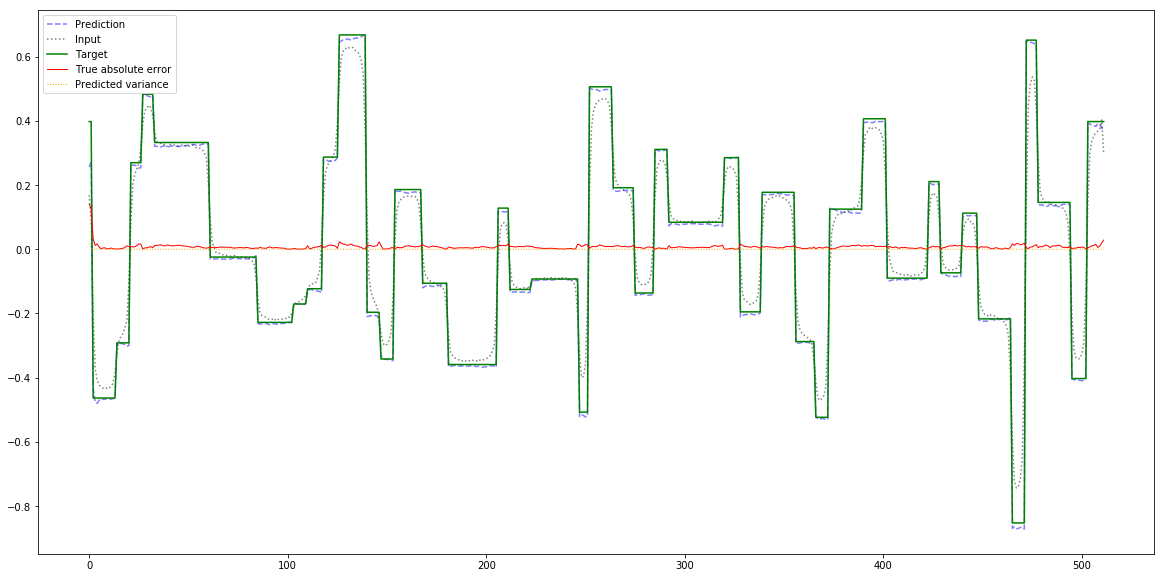

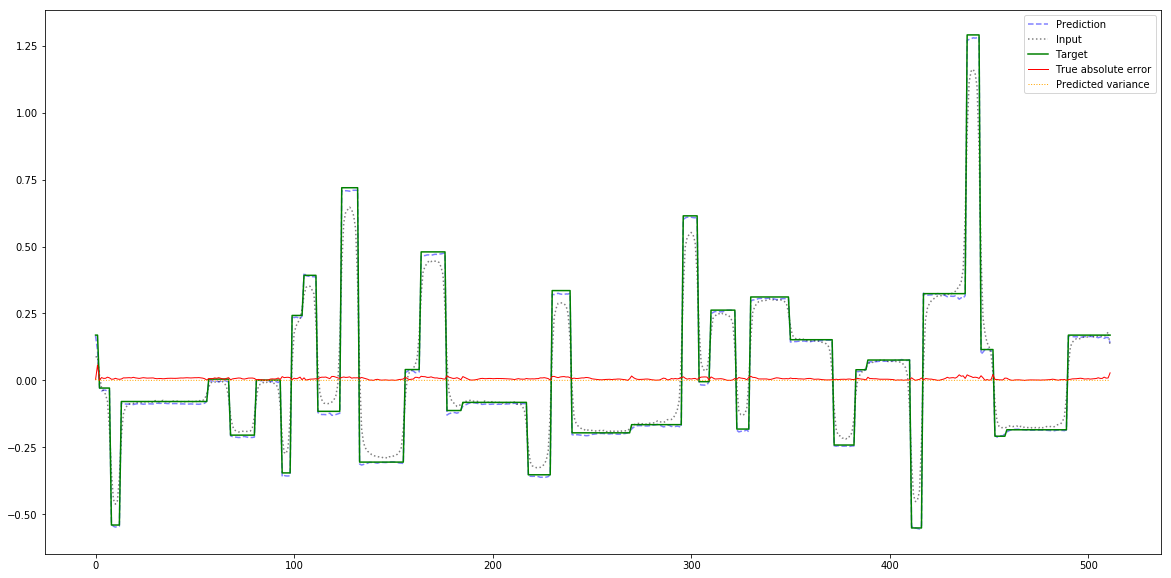

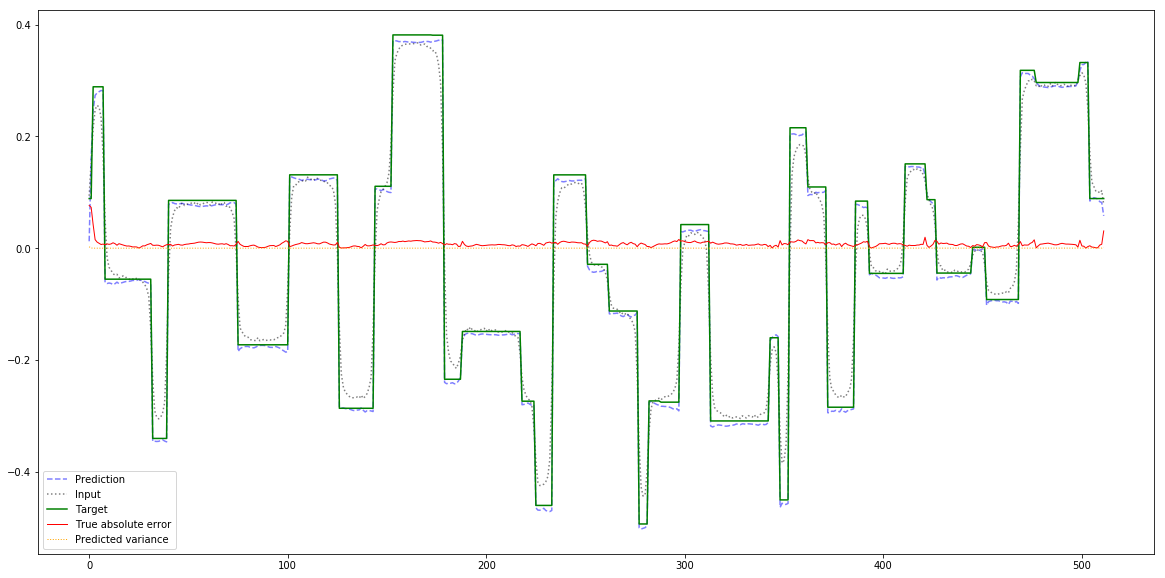

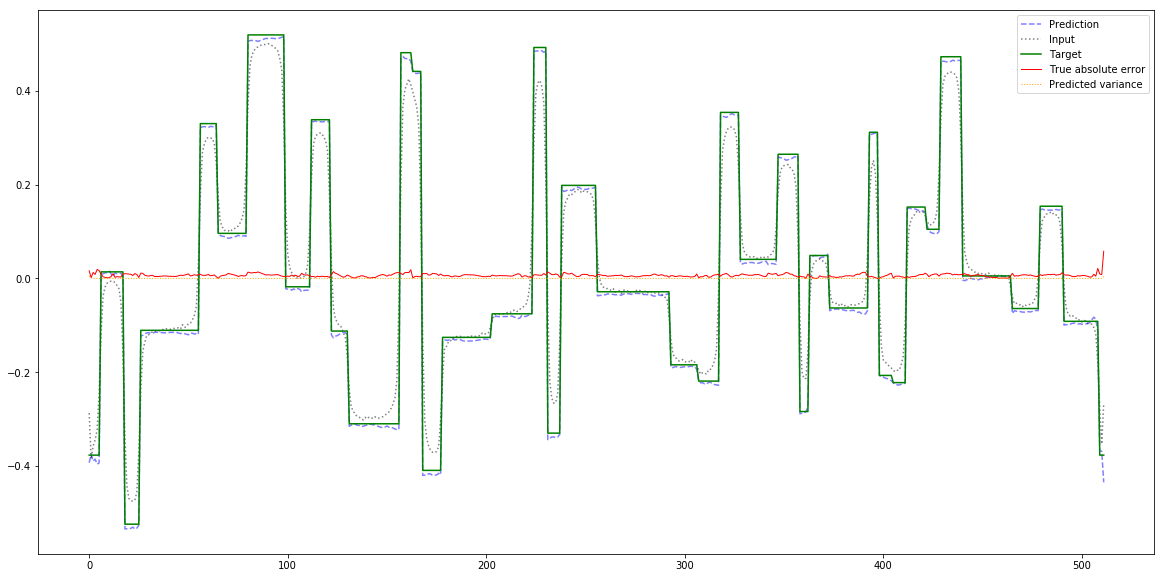

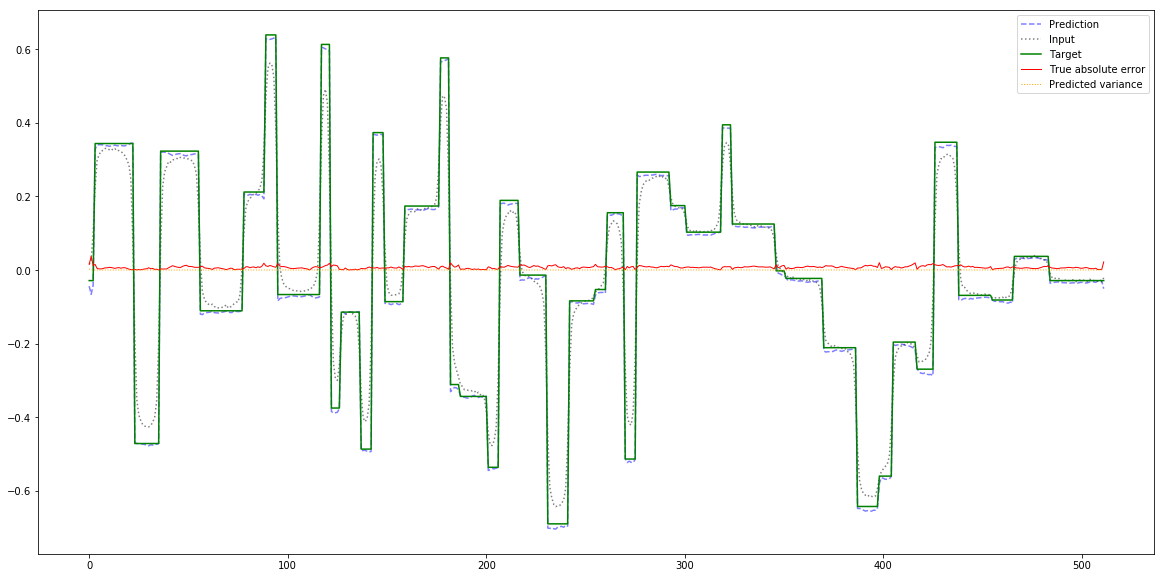

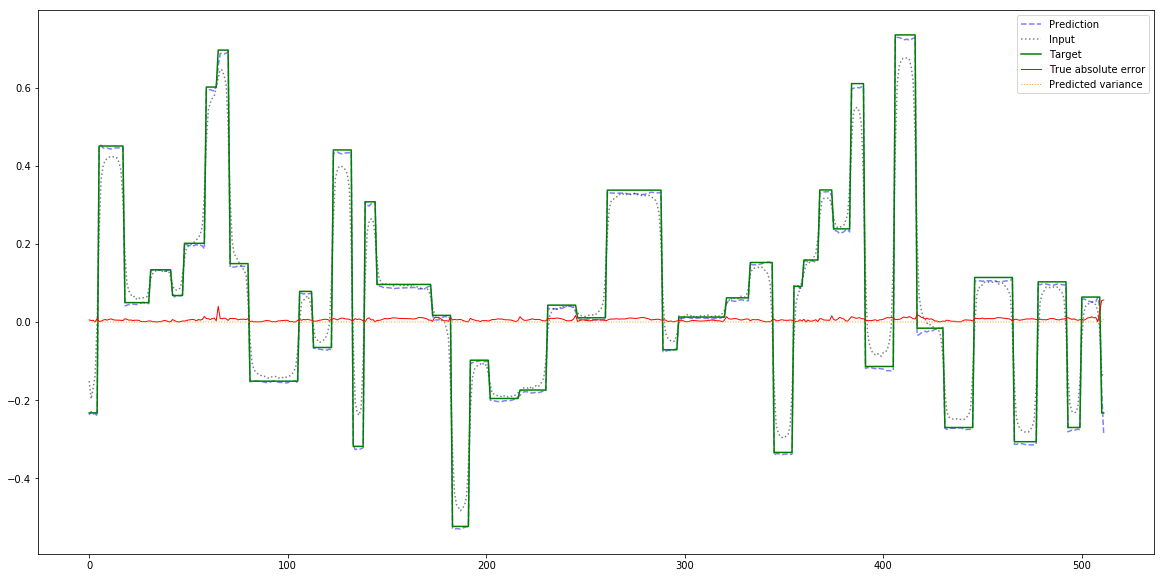

In [76]:
make_plot_var_pred(train_matrices_path, 'train', 6)

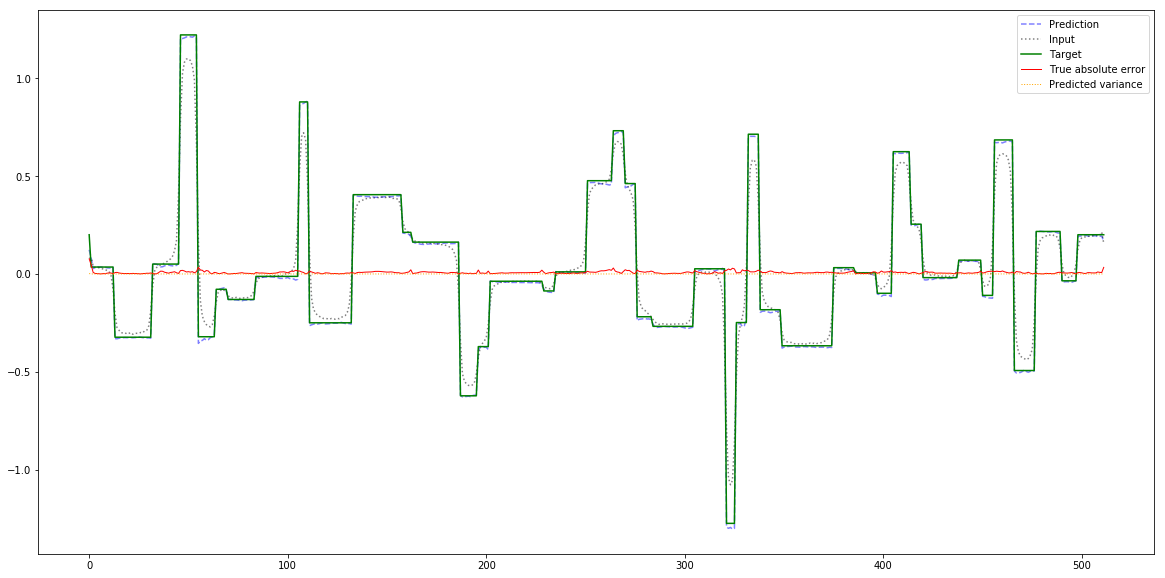

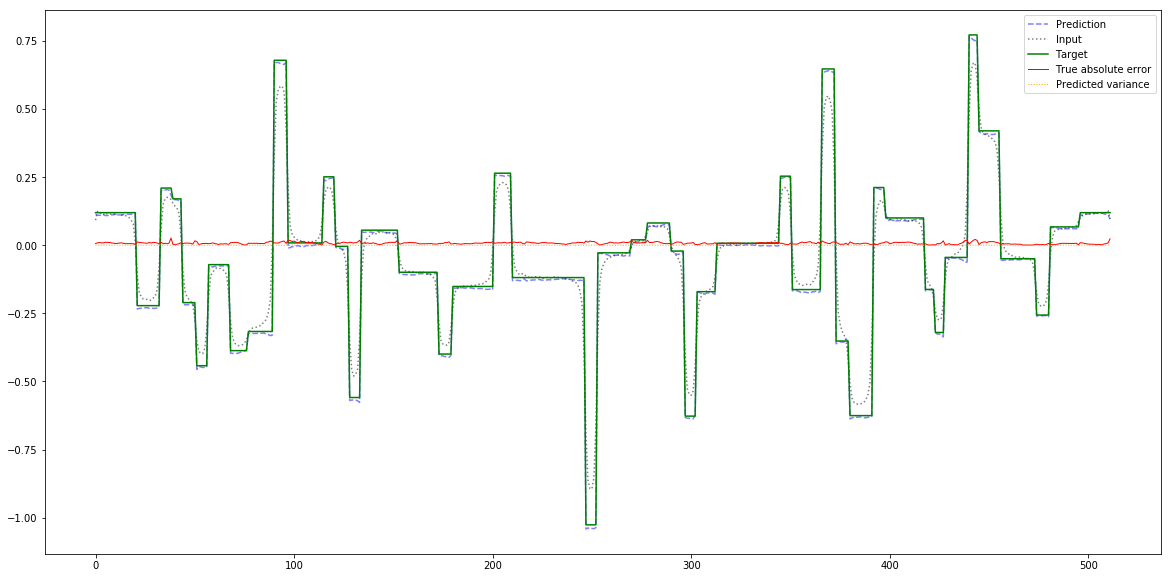

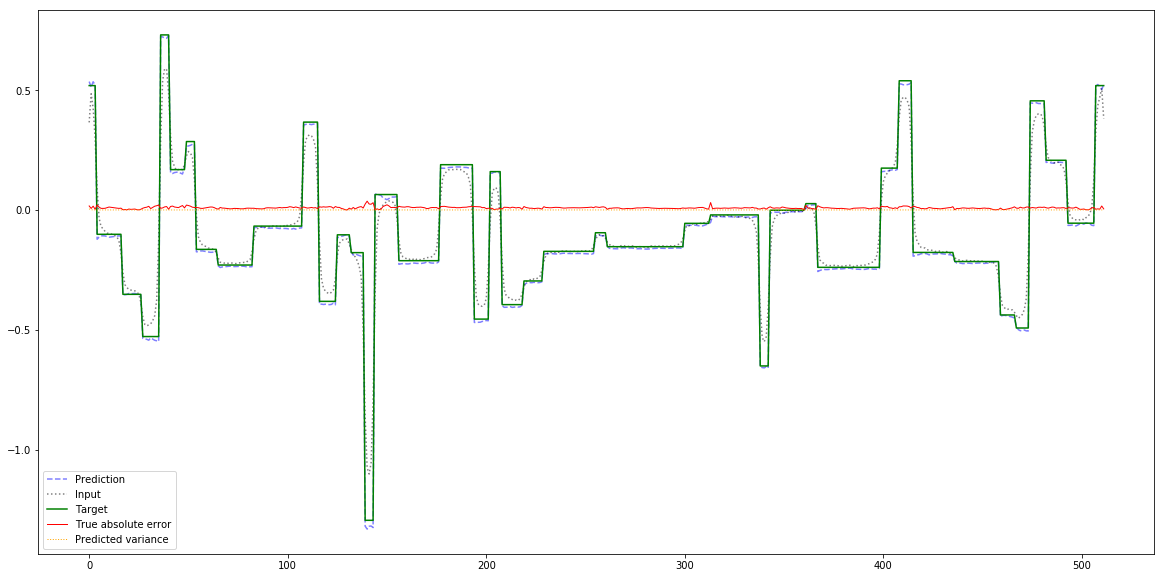

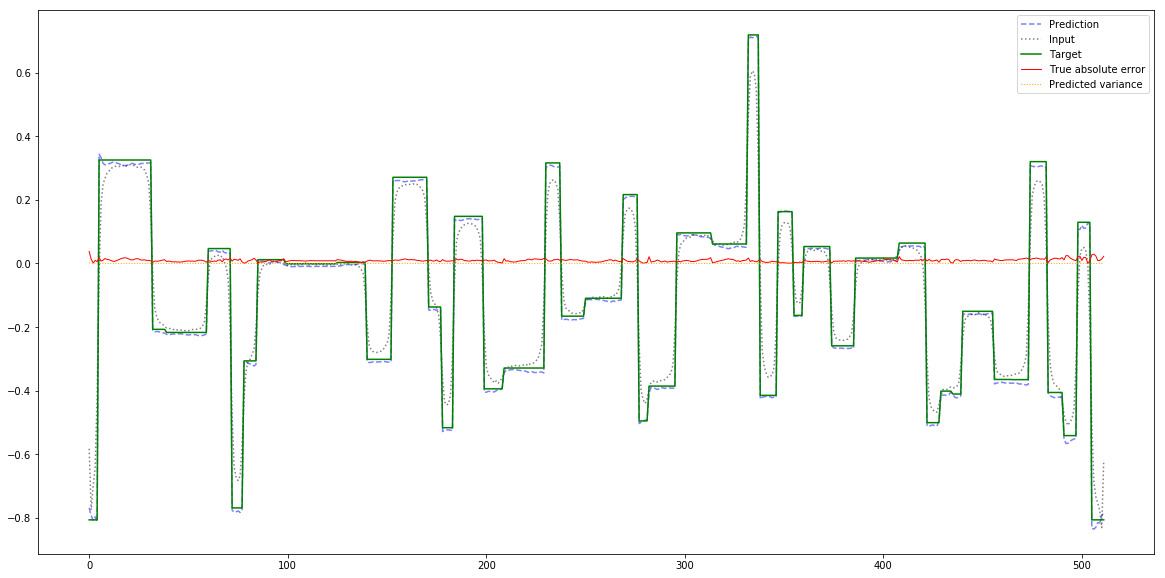

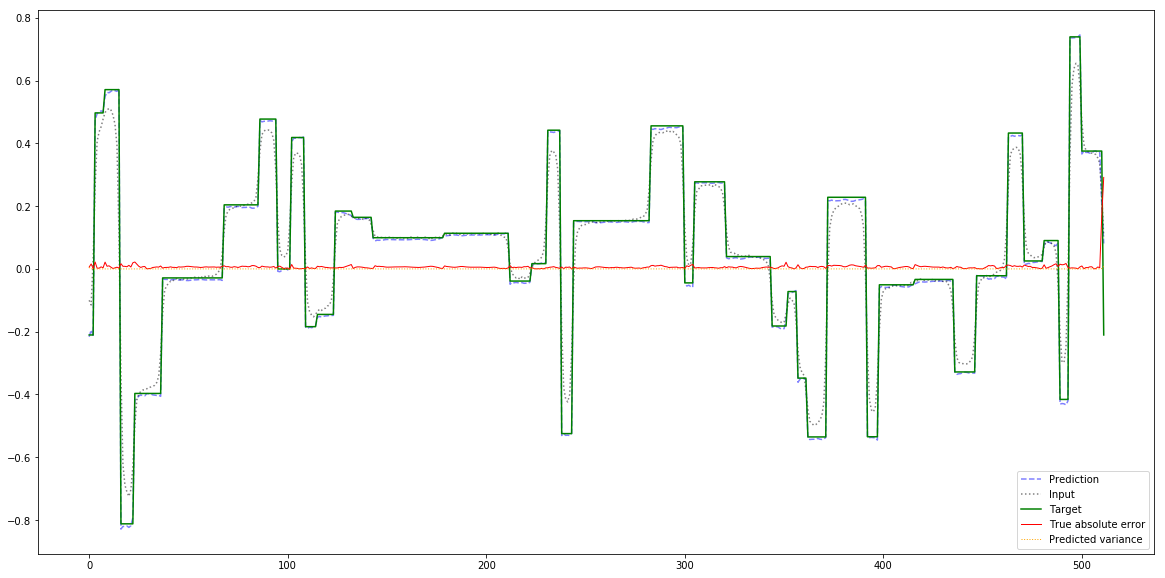

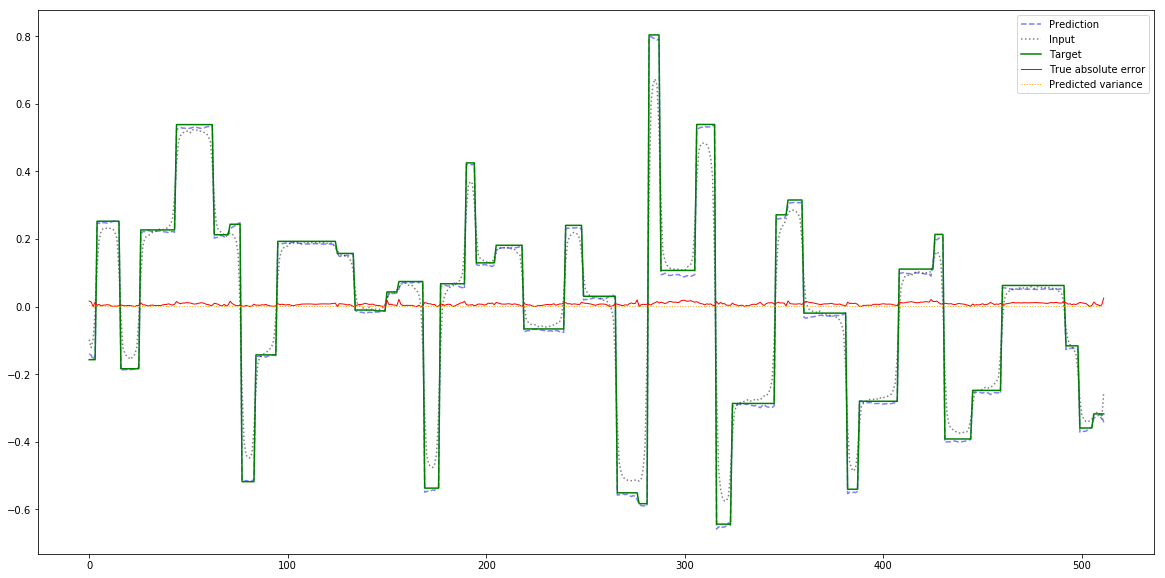

In [77]:
make_plot_var_pred(test_matrices_path, 'test', 6)

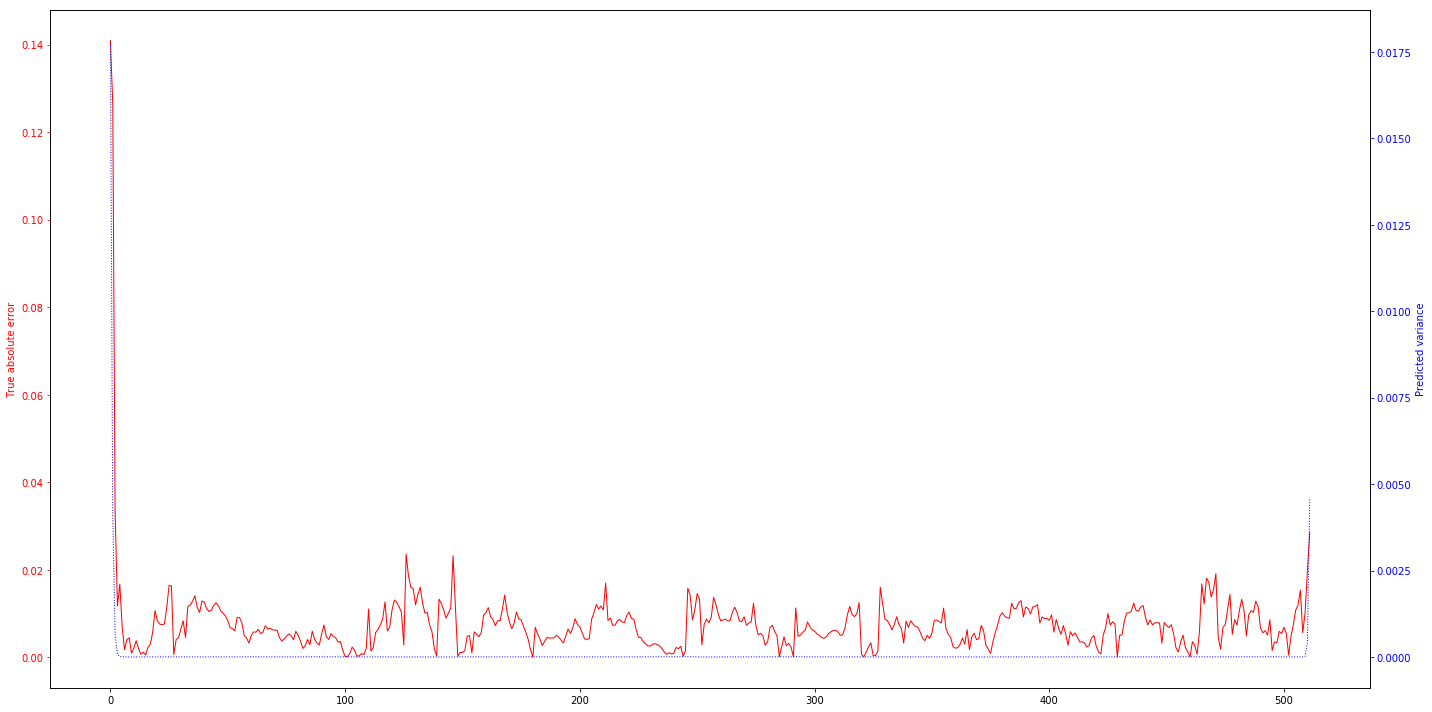

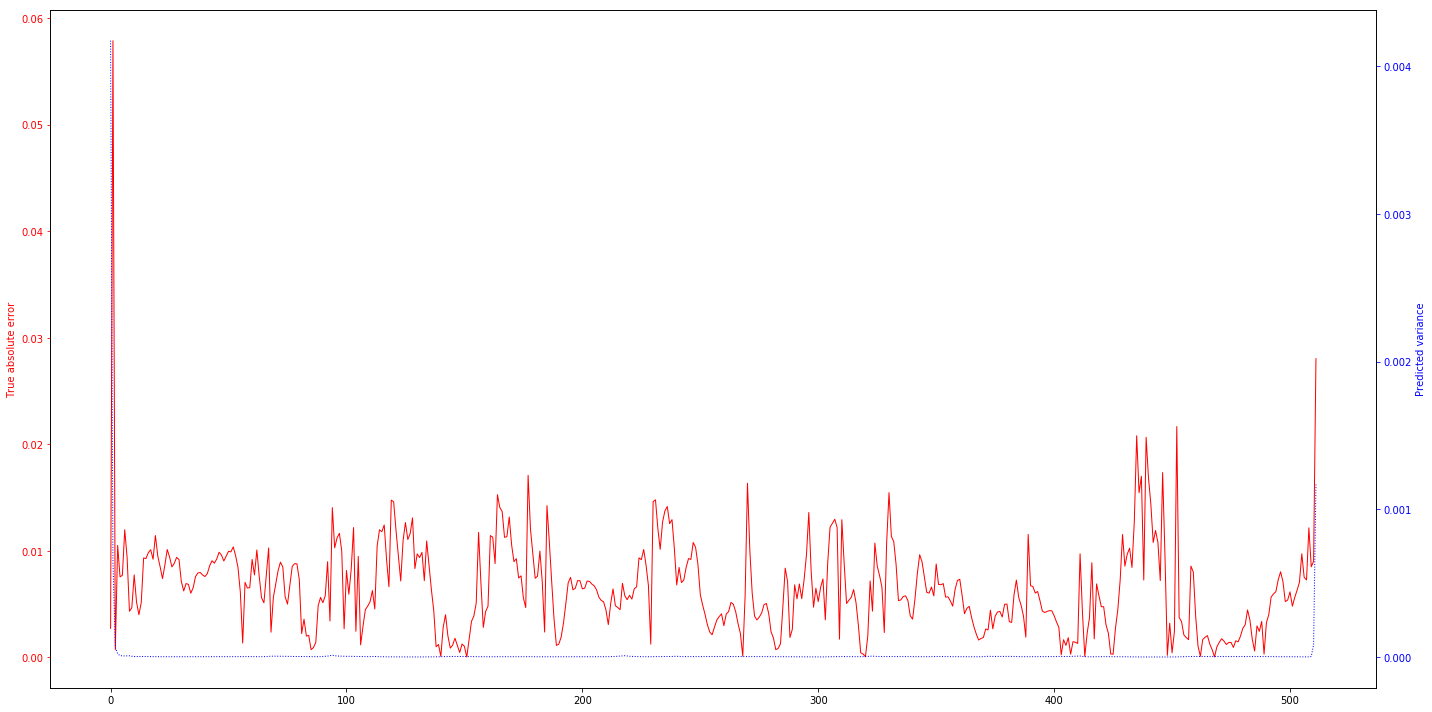

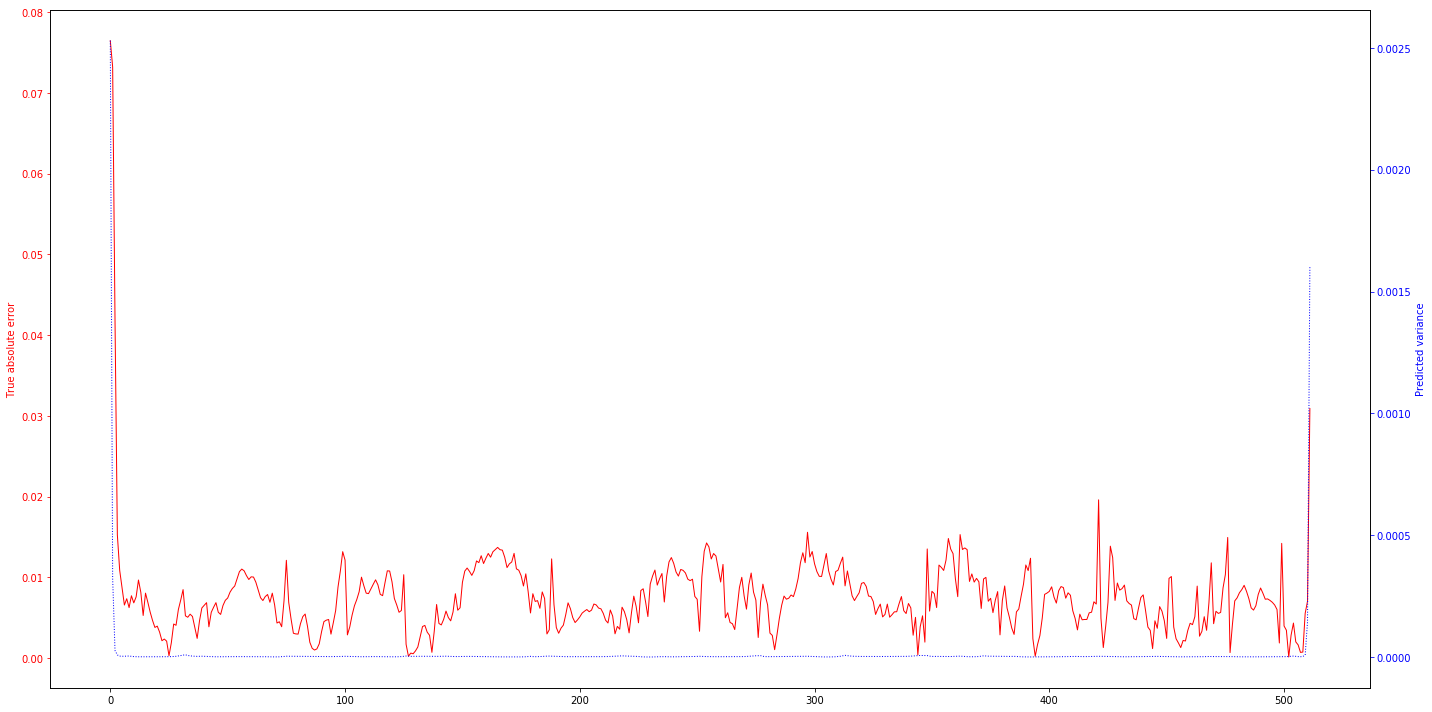

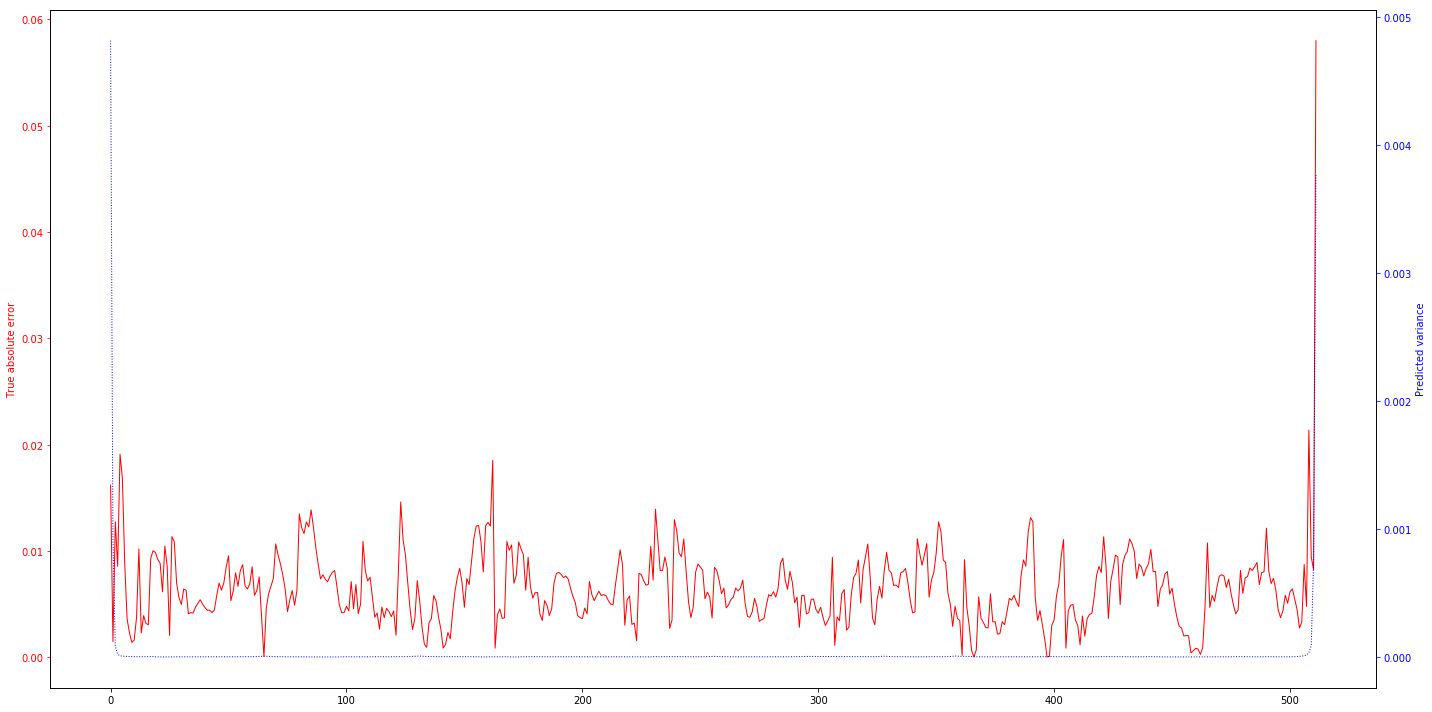

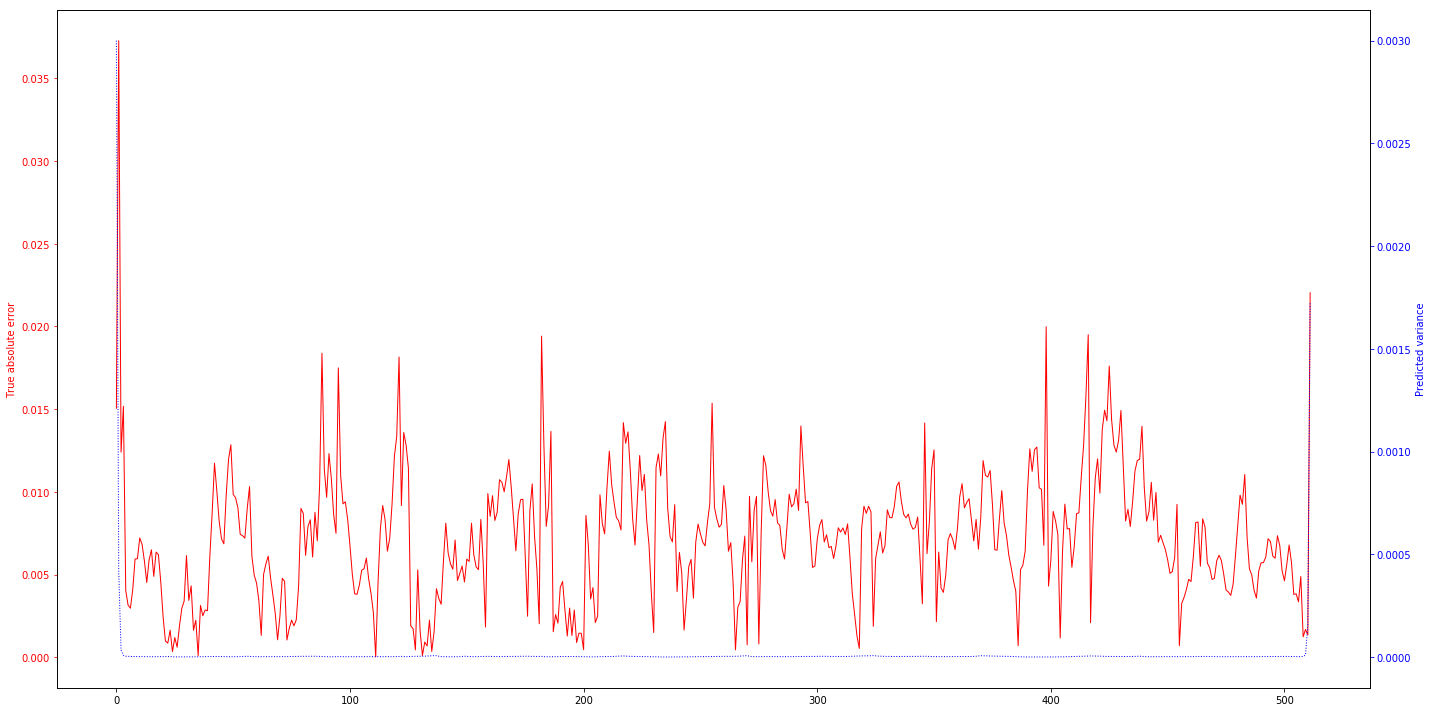

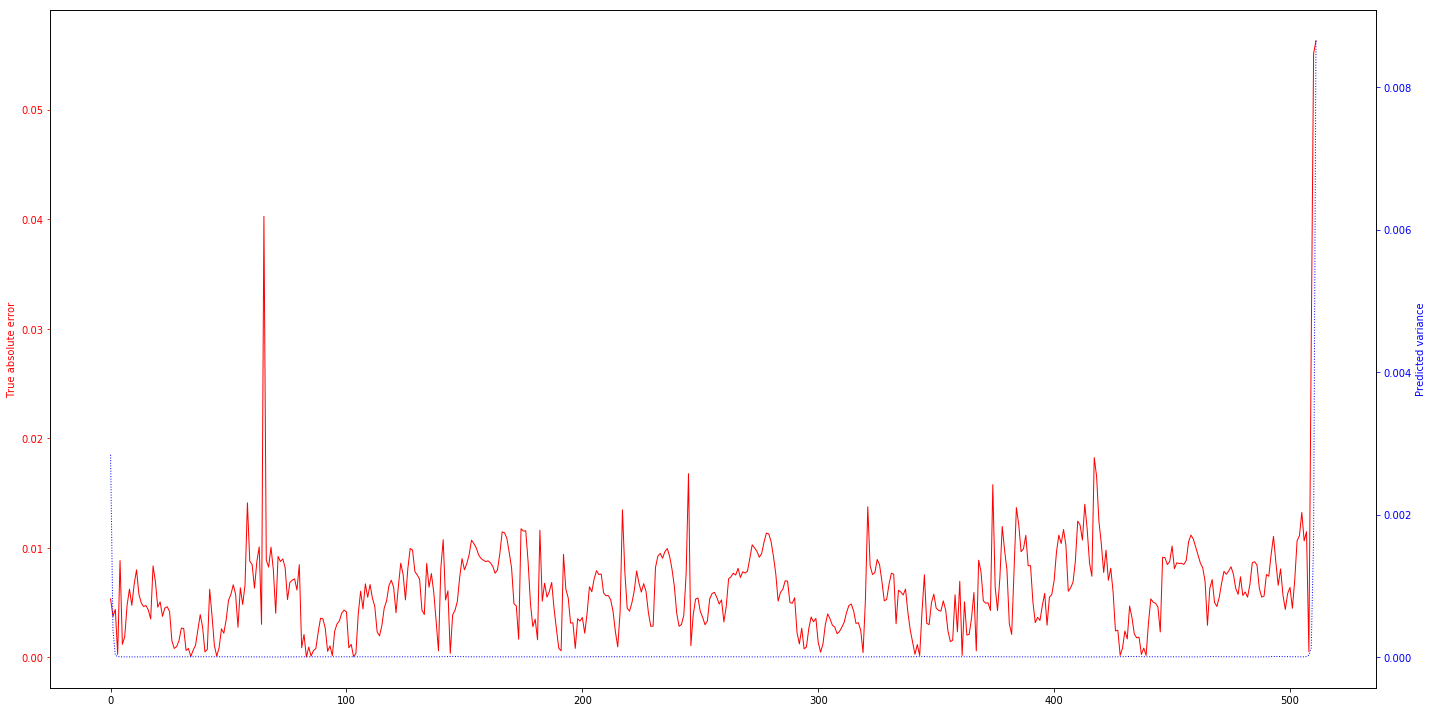

In [78]:
make_plot_error_only(train_matrices_path, 'train', 6)

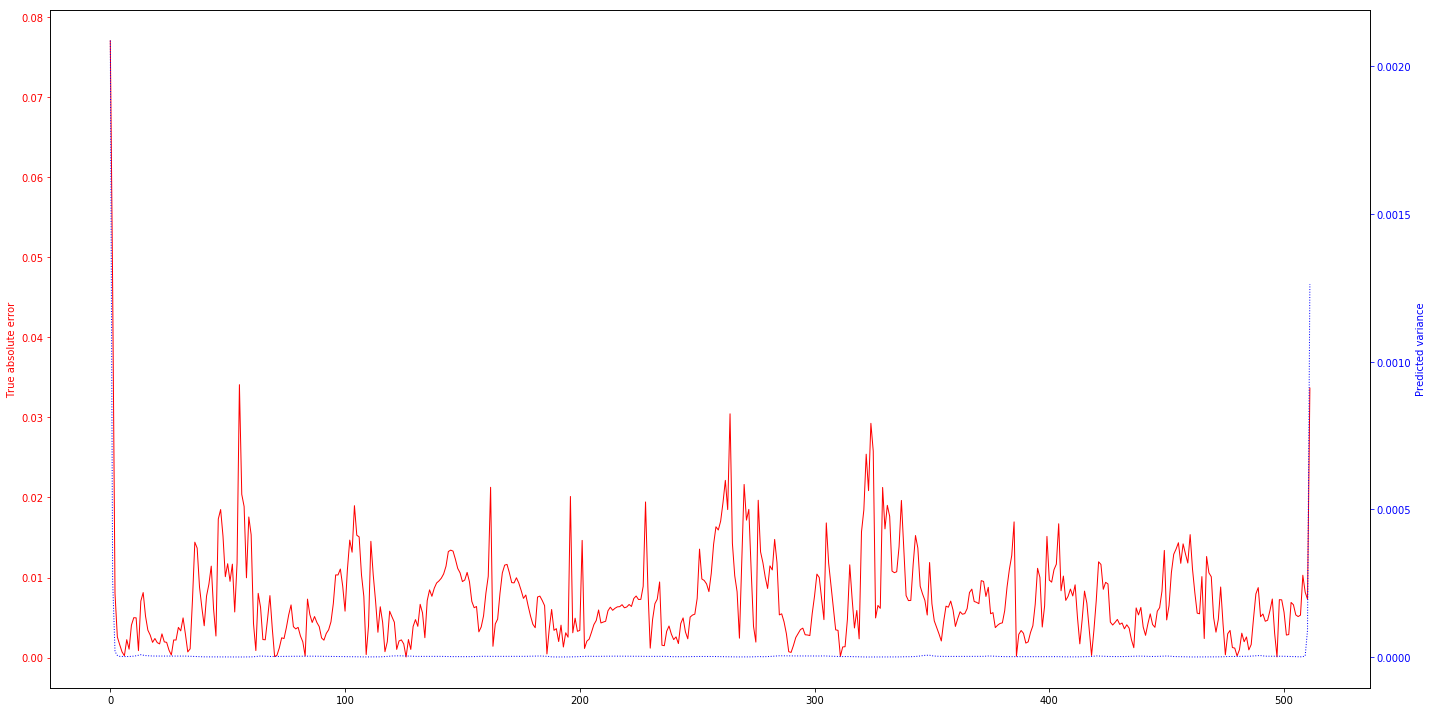

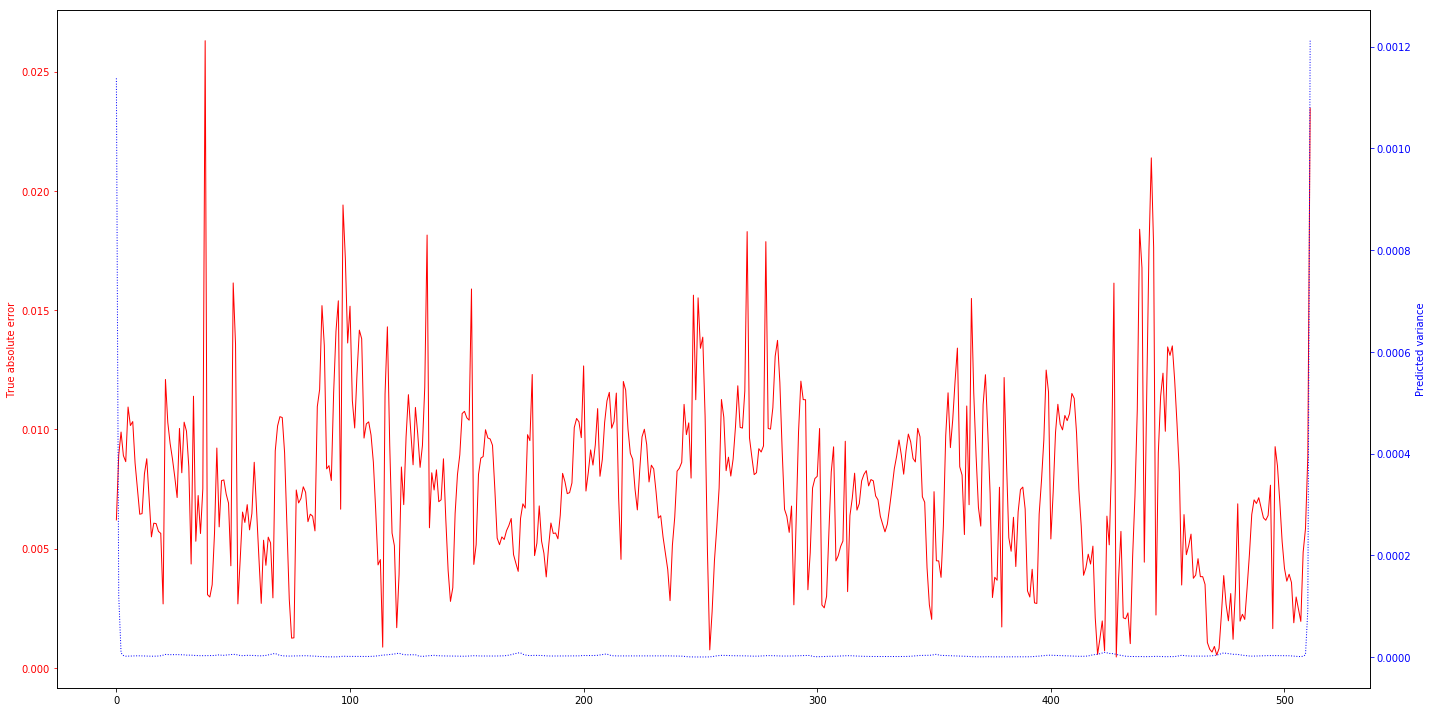

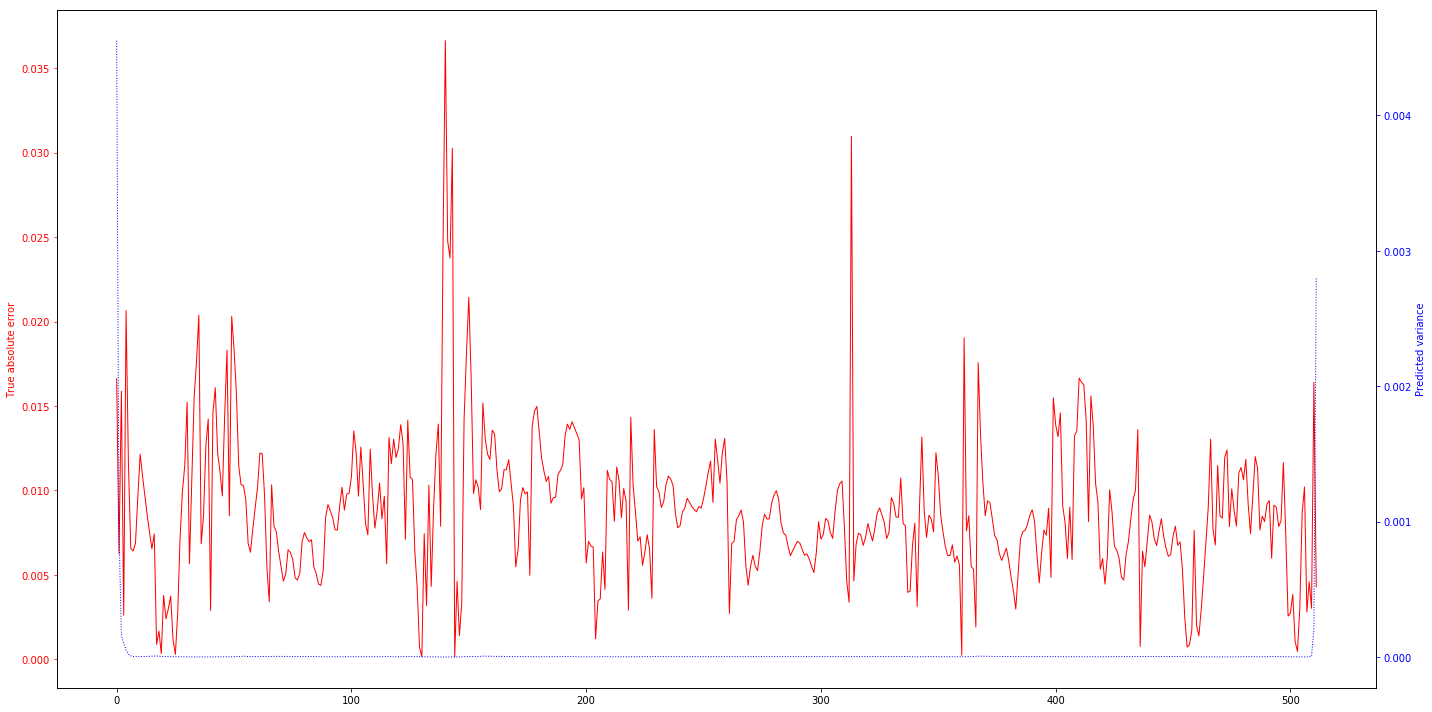

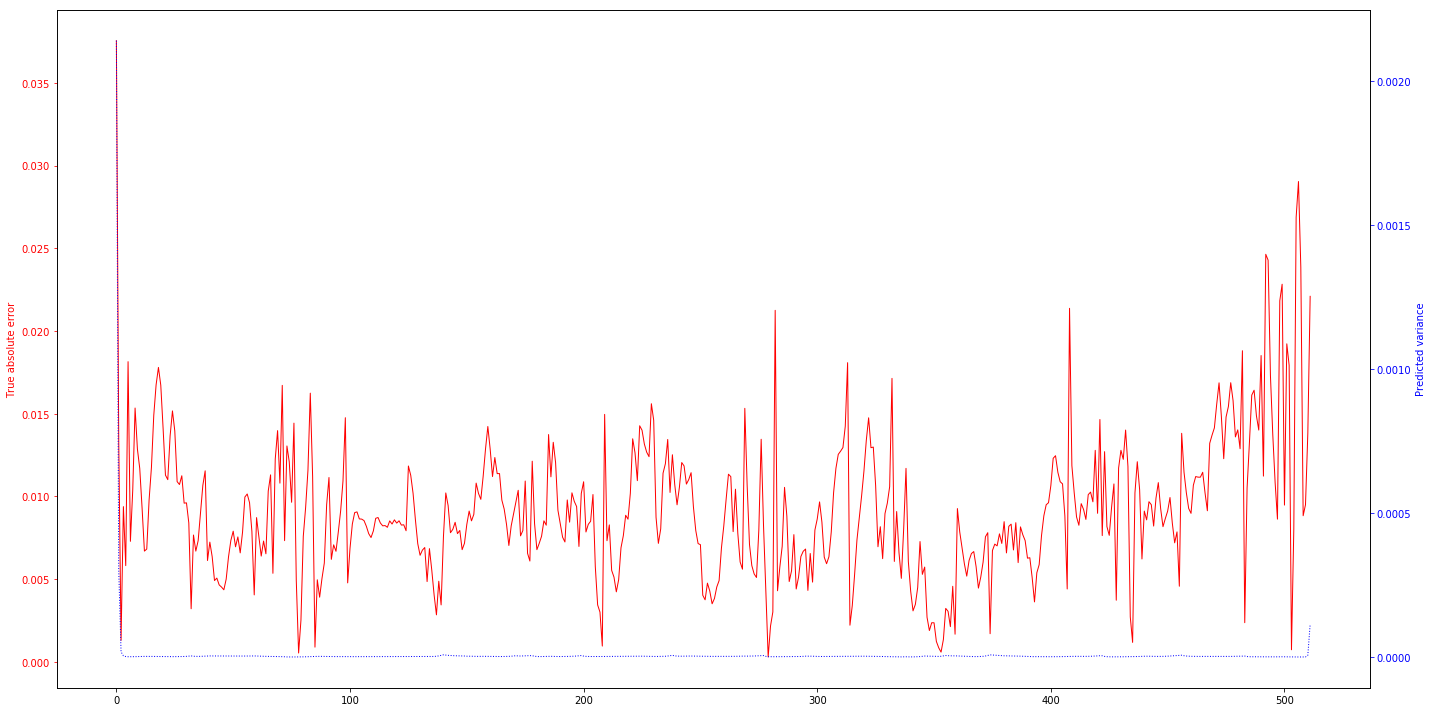

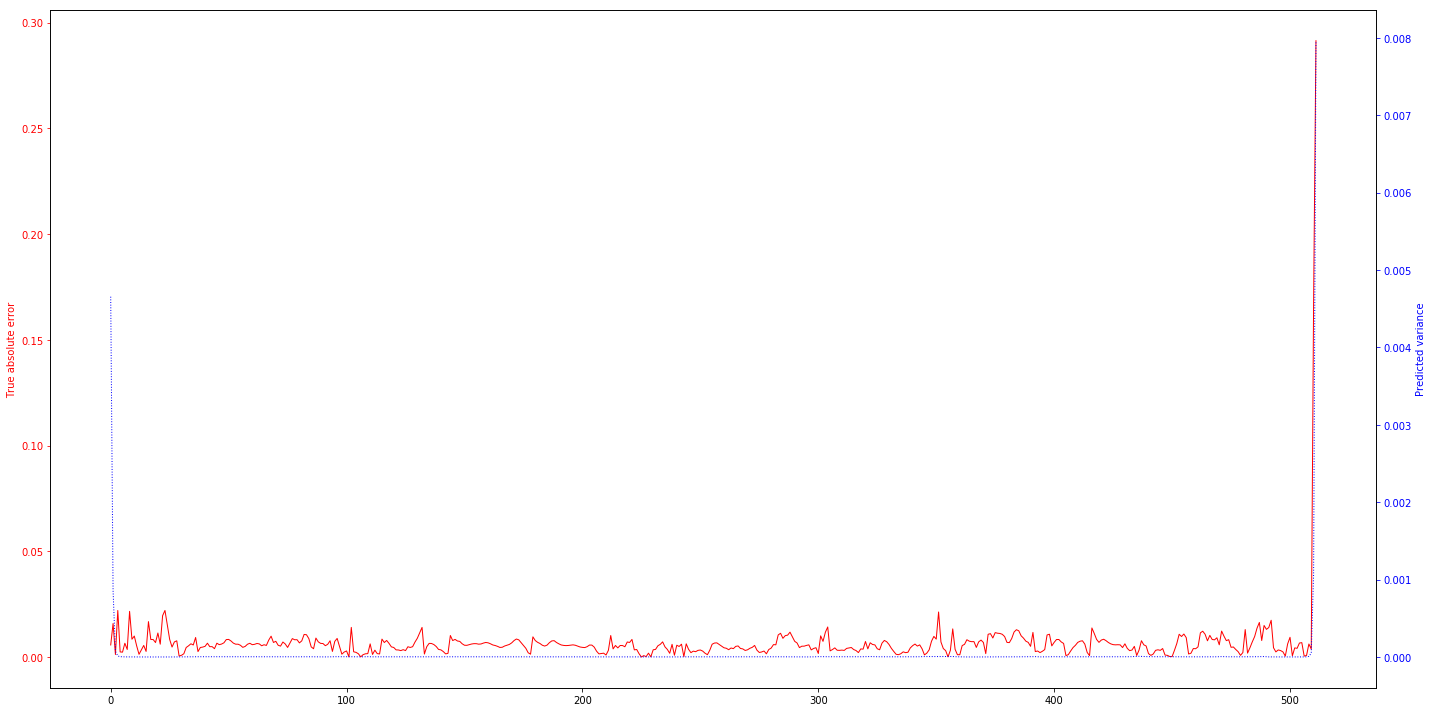

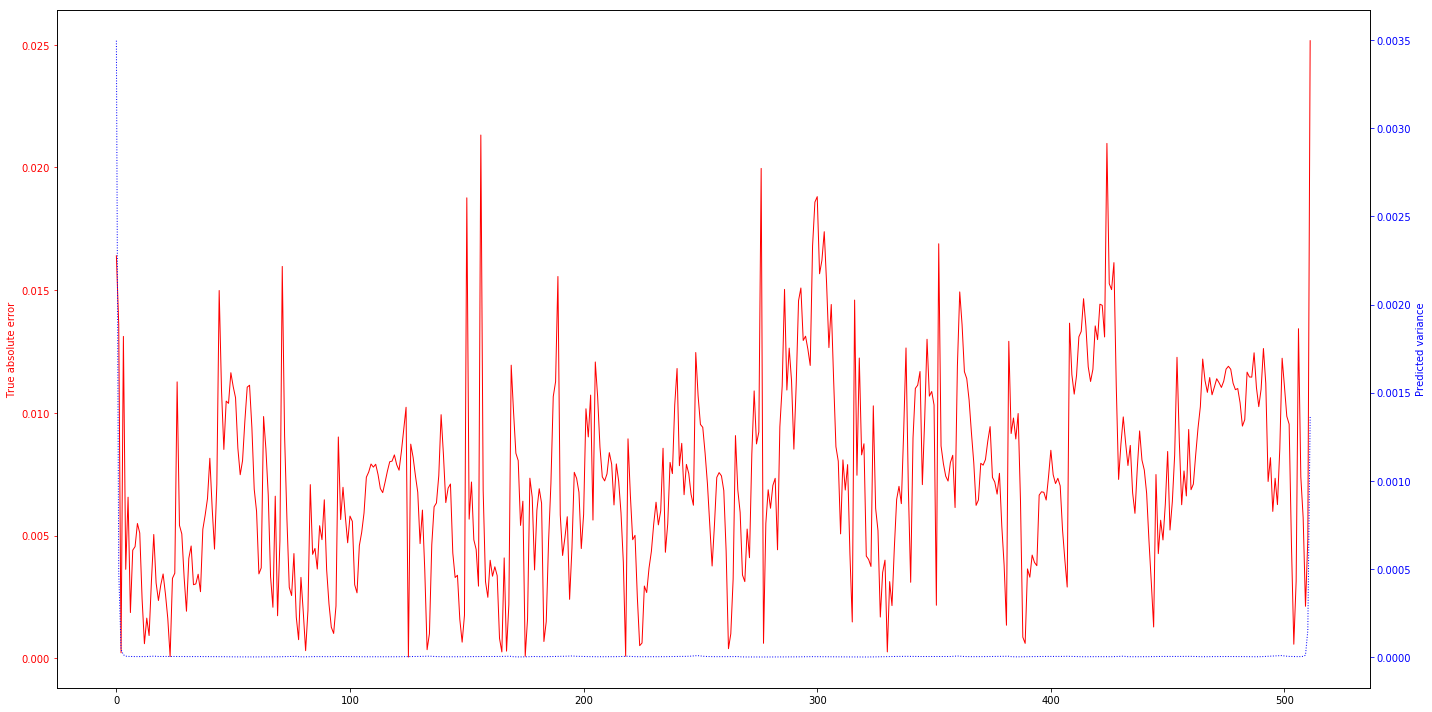

In [79]:
make_plot_error_only(test_matrices_path, 'train', 6)